## Final Project Submission

Please fill out:
* Student name: Lucy Hayes
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis
* Blog post URL:


# Importing Data and Getting a Quick Glance

In [1]:
# Import Pandas and read in csv
import pandas as pd
df = pd.read_csv("kc_house_data.csv")
print(len(df))
df.head()


21597


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
## Let's look at the distribution of the data 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Removing/Replacing NA's 

In [3]:
# Glance at NAs
nas = df.isna()
nas.sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<b> NA Results: </b> <br/>
yr_renovated: 2842, 13% - since we're changing this to 0 & 1s, replace na's with zeroes <br/>
view: 63 - so few and insignificant - let's remove them <br/>
waterfront: 2376 - Let's check to see that this is categorical:

In [4]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

Great, since there is a large discrepenancy, let's replace the NA's with 0's and replace the rest of the NAs:

In [5]:
# Replace yr_renovated with 0's
df['yr_renovated'] = df['yr_renovated'].fillna(0)
# Replace Waterfront NA's with 0's
df['waterfront'] = df['waterfront'].fillna(0)
# convert to bool:
df['waterfront'] = df['waterfront'].astype('int64')
# Drop remaining views nas
df = df.dropna()

# Check that all na's are gone
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Check for Placeholder or Extreme Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null int64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 3.6+ MB


The first two jarring things are that date and sqft_basement are listed as objects. Let's look into sqft_basement further:

In [7]:
df.sqft_basement.value_counts().head()

0.0      12798
?          452
600.0      216
500.0      209
700.0      207
Name: sqft_basement, dtype: int64

 There are 12798 0's, implying no basement. There are also 452 ?'s. Let's remove teh 0's and convert sqft_basement to a float

In [8]:
df = df[df.sqft_basement != '?']
df["sqft_basement"] = pd.to_numeric(df.sqft_basement)

Since there are so many 0's, it would be useful to create a binary variable that shows if the house has a basement or not, where 0 sqft implies no basement. 

In [9]:
# add a column for T/F has basement or not
has_basement = []
for basement in df["sqft_basement"]:
    if basement == 0:
        has_basement.append(0)
    else:
        has_basement.append(1)
df['has_basement'] = has_basement
df = df.drop('sqft_basement', axis = 1)

In [10]:
# Let's look at the distribution of the dataframe again and see if there are any values that seem out of the ordinary
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
count,2.108200e+04,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.006688,0.233327,3.409828,7.657717,1789.000000,1971.023337,68.359359,98077.858837,47.560371,-122.213843,1986.917418,12732.514135,0.392942
std,2.876423e+09,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.081509,0.765066,0.650597,1.173690,828.369355,29.323120,363.029573,53.528769,0.138568,0.140607,685.544250,27148.781580,0.488416
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123700e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904970e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000,0.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000,1.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


<b>There are a few things that still seem out of the ordinary:</b>
<br/>
    33 Bedrooms seems unfathomable
<br/>
    Yr_Renovated has many 0's - probably standing for a house that was not renovated. Let's change this to a binary variable instead
<br/>
    We should also check the categories of the following: view, condition, grade, and zipcode
    <br/>
    <br/>
First let's look at 33 Bedrooms:


In [11]:
df.bedrooms.value_counts()

3     9607
4     6724
2     2685
5     1555
6      260
1      191
7       36
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Let's look closer at this one value of 33 bedrooms:

In [12]:
df.loc[df["bedrooms"] >30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0.0,...,7,1040,1947,0.0,98103,47.6878,-122.331,1330,4700,1


Clearly this is a mistake if there's only 1.75 bathrooms to 33 bedrooms... I vote to remove from dataset:

In [13]:
df = df[df.bedrooms != 33]

Next, yr_renovated had a lot of 0's so let's check out the value counts

In [14]:
df.yr_renovated.value_counts().head()
# Output: year renovated has many 0's - implying 0 if it was not renovated 


0.0       20359
2014.0       69
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

Let's change this column to a boolean of if it was renovated or not and drop the original column

In [15]:
is_renovated = []
for year in df["yr_renovated"]:
    if year == 0:
        is_renovated.append(0)
    else:
        is_renovated.append(1)
df['is_renovated'] = is_renovated

# drop yr_renovated
df = df.drop('yr_renovated', axis = 1)

Checking categories of grade:

In [16]:
df.grade.value_counts()

7     8761
8     5922
9     2546
6     1991
10    1108
11     389
5      235
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

Since there's only one entry with a grade of 3, let's drop it:

In [17]:
df = df[df.grade != 3]

Next, let's check the categories of View:

In [18]:
df.view.value_counts()

0.0    19016
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

View is a range 0,1,2,3,4, majority of which are in 0 (19422), so it would probably be more useful for view to be binary- as in has viewed not has viewed, and drop the original column

In [19]:
is_viewed = []
for view in df['view']:
    if view == 0:
        is_viewed.append(0)
    else:
        is_viewed.append(1)

df['is_viewed'] = is_viewed

#drop view
df = df.drop('view', axis = 1)

Next, I want to see if there's a way to change zipcodes into something more meaningful

In [20]:
len(df.zipcode.value_counts())

70

There are 70 possible zipcodes, which would be too messy to make a categorical variable. Instead, I will group the zipcodes by their price means as a way of putting value to the zipcode without making it categorical

In [21]:
zip_means = df.groupby('zipcode')['price'].mean()
df['zip_means'] = df.zipcode.map(zip_means)
df = df.drop('zipcode', axis = 1)


In [22]:
# Cast as Category
# df['zip_means'] = df.zip_means.astype('category')

Since this is now our main indicator of location, let's drop lat and long

In [23]:
df = df.drop(labels = ['lat', 'long'], axis = 1)

Next, since there is seasonailty in the housing market I want to convert date into a non-object, and then into months

In [24]:
## convert to date.time so it's no longer an object
df.date = pd.to_datetime(df.date)

# Convert as a categorical variable
df['month'] = df.date.dt.month_name().astype('category')
df.drop('date', axis = 1, inplace = True)


In [25]:
# Convert months to dummies and add to DF
month_dummy = pd.get_dummies(df.month)
df = df.drop([ 'month'], axis = 1)
df =  pd.concat([df,  month_dummy], axis=1)

Next since sqft_living = sqft_above + sqft_basement, I want to drop sqft_living

In [26]:
df = df.drop('sqft_living', axis = 1)

Finally, let's check for duplicate ids and remove them if necessary

In [27]:
copies = pd.concat(g for _, g in df.groupby("id") if len(g) > 1)
len(copies)

345

Since there are only 345 duplicates, let's go ahead and delete them since it's a small portion of the overall dataset

In [28]:
df = df.reset_index().drop_duplicates(subset = 'id', keep = False)
df['id'] = df.id.astype('int')
df = df.set_index('id')

# Looking at Numerical Variables
So far, the categorical variables we found were waterfront and view. We also added month, has_basement, and is_renovated.



In [29]:
df.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'has_basement', 'is_renovated',
       'is_viewed', 'zip_means', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September'],
      dtype='object')

Let's plot the remaining numerical variables to see if there are any visible trends

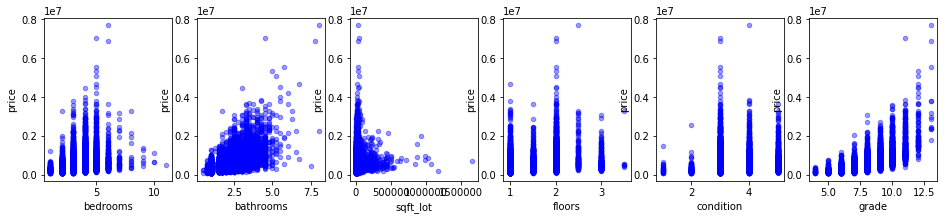

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 

feature_cols = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors',
        'condition', 'grade', 'sqft_above', 'yr_built','sqft_living15', 'sqft_lot15', 'price', 'zip_means']

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))

for xcol, ax in zip(list(feature_cols)[0:6], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

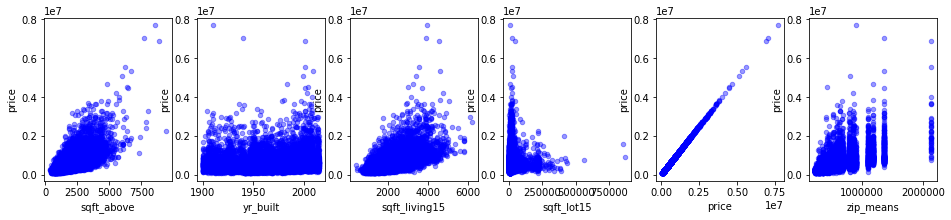

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))

for xcol, ax in zip(list(feature_cols)[6:12], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

Immediately we can see that Bedrooms, Floors, and Bathrooms are interesting. 
Bedrooms and bathrooms should be categorical.
<br/>
<br/>
Below, we transfrom  bedrooms and bathrooms to categorical variables. 

Check correlation of these variables re. price

In [32]:
df[feature_cols].corr().price.sort_values(ascending = False)

price            1.000000
grade            0.667133
zip_means        0.638218
sqft_above       0.604278
sqft_living15    0.584299
bathrooms        0.524305
bedrooms         0.317375
floors           0.254192
sqft_lot         0.086487
sqft_lot15       0.082318
yr_built         0.050814
condition        0.031658
Name: price, dtype: float64

In [33]:
df1 = df.copy()

id
7129300520     (2, 3]
6414100192     (2, 3]
5631500400     (0, 2]
2487200875    (3, 11]
1954400510     (2, 3]
Name: bedrooms, dtype: category
Categories (3, interval[int64]): [(0, 2], (2, 3], (3, 11]]

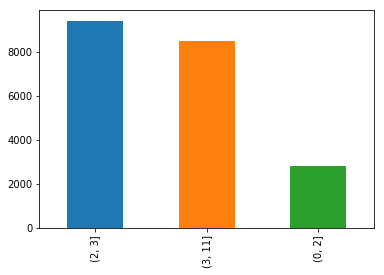

In [34]:
# Bedrooms to Bins
bins = [0,2,3,11]
bins_br = pd.cut(df1['bedrooms'], bins, right = True)
bins_br = bins_br.cat.as_unordered()
bins_br.value_counts().plot(kind = 'bar')
bins_br.head()

In [35]:
df1['bedrooms'] = bins_br

In [36]:
df1.bathrooms.describe()

count    20735.000000
mean         2.121232
std          0.768009
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [37]:
# Bathrooms to Bins
# bins = [0,2,3,4,9]
# bins_bath = pd.cut(df1['bathrooms'], bins, right = True)
# bins_bath = bins_br.cat.as_unordered()
# bins_bath.value_counts().plot(kind = 'bar')
# bins_bath.head()

In [38]:
# df1['bathrooms'] = bins_bath

In [39]:
bedrooms_dummy = pd.get_dummies(bins_br, prefix = 'bedrooms')
# bathrooms_dummy = pd.get_dummies(bins_bath, prefix = 'bathrooms')

In [40]:
df1 = df1.drop(['bedrooms'], axis = 1)
df1 =  pd.concat([df1, bedrooms_dummy], axis=1)

In [41]:
df1.columns

Index(['index', 'price', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'has_basement', 'is_renovated', 'is_viewed', 'zip_means',
       'April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'bedrooms_(0, 2]',
       'bedrooms_(2, 3]', 'bedrooms_(3, 11]'],
      dtype='object')

# Look at Numerical Variables
Now that we've converted some of our variables to categories, let's explore the remaining continuous variables. <br/>
We can start by looking at a scatter matrix to see general trends, and to check for collinearity. 

In [42]:
df1.columns


Index(['index', 'price', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'has_basement', 'is_renovated', 'is_viewed', 'zip_means',
       'April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'bedrooms_(0, 2]',
       'bedrooms_(2, 3]', 'bedrooms_(3, 11]'],
      dtype='object')

In [43]:
cat_cols = ['waterfront', 'has_basement', 'is_renovated', 'is_viewed',
       'April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'bedrooms_(0, 2]', 'bedrooms_(2, 3]', 'bedrooms_(3, 11]']
df_cat = df1[cat_cols].copy()

In [44]:
num_cols = ['sqft_lot','floors', 'condition', 'grade', 'sqft_above',
        'yr_built', 'sqft_living15','sqft_lot15', 'bathrooms', 'zip_means']
df_num = df1[num_cols].copy()


# Checking Normality of Variables and Performing Transformations

Transform Numerical Features 

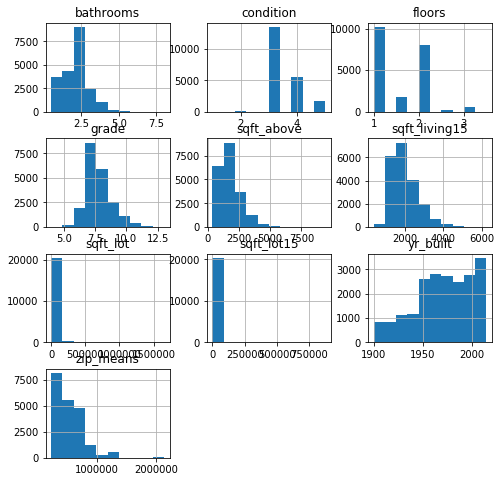

In [45]:
df_num.hist(figsize = [8,8]);

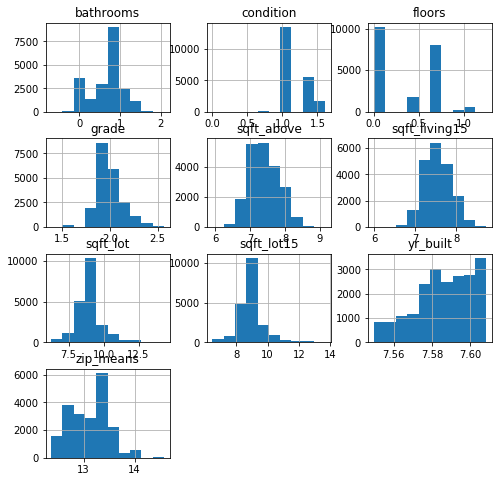

In [46]:
import numpy as np

# sqft_living = df_num['sqft_living']
sqft_lot = df_num['sqft_lot']
floors = df_num['floors']
condition = df_num['condition']
grade =df_num['grade']
sqft_above = df_num['sqft_above']
# sqft_basement = df_num['sqft_basement']
yr_built = df_num['yr_built'] 
sqft_living15 = df_num['sqft_living15']
sqft_lot15 = df_num['sqft_lot15']
bathrooms = df_num['bathrooms']
zip_means = df_num['zip_means']
colz = [ sqft_lot,floors, condition, grade, sqft_above,
        yr_built, sqft_living15,sqft_lot15, bathrooms, zip_means]

# log transform function
def log_transform(x):
    '''Takes in an array and perfoms a log transform on the data'''
    log = np.log(x)
    return log

transformed = pd.DataFrame([])

for column, name in zip(colz, num_cols):
    transformed[name] = log_transform(column)

transformed.hist(figsize = [8,8]);


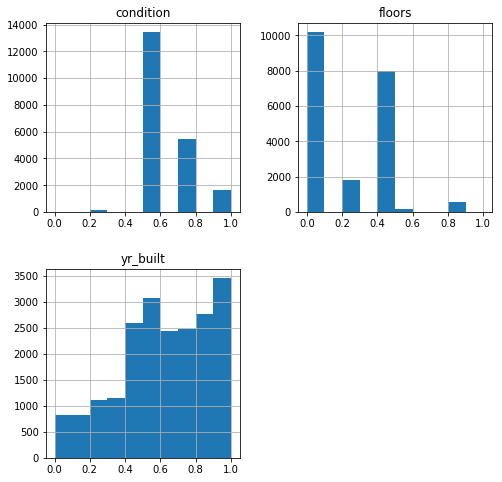

In [104]:
# Further transform variables
# restore log values
## @Brandon For some reasom this is making it worse so currently just appending the log transform??


#min-max function
def min_max(x):
    '''Takes in an array and perfoms a min-max transform on the data'''
    min_max = (x - min(x))/(max(x)-min(x))
    return min_max

# standardization function
def standardization(x):
    '''Takes in an array and perfoms standardization on the data'''
    s = (x-np.mean(x))/np.sqrt(np.var(x))
    return s

# create dataframe of transformed values
final = pd.DataFrame([])
final['condition'] = min_max(condition)
final['floors'] = min_max(floors)
final['yr_built'] = min_max(yr_built)
    
# plot histograms for normality
final.hist(figsize = [8,8]);

In [105]:
transformed = transformed.drop(labels =['condition', 'floors', 'yr_built'], axis = 1)

In [106]:
df_cleaned = pd.concat([df1['price'],transformed, final, df_cat], axis =1)

In [107]:
## pd.plotting.scatter_matrix(df_cleaned, figsize = (18,18));

In [108]:
# Look at a correlation matrix to see where there are variables that are highly collinear. 
abs(df_cleaned.corr() > .70)

,price,sqft_lot,grade,sqft_above,sqft_living15,sqft_lot15,bathrooms,zip_means,condition,floors,...,July,June,March,May,November,October,September,"bedrooms_(0, 2]","bedrooms_(2, 3]","bedrooms_(3, 11]"
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living15,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot15,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zip_means,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [109]:
abs(df_cleaned.corr() > .70).sum()

price               1
sqft_lot            2
grade               2
sqft_above          3
sqft_living15       2
sqft_lot15          2
bathrooms           1
zip_means           1
condition           1
floors              1
yr_built            1
waterfront          1
has_basement        1
is_renovated        1
is_viewed           1
April               1
August              1
December            1
February            1
January             1
July                1
June                1
March               1
May                 1
November            1
October             1
September           1
bedrooms_(0, 2]     1
bedrooms_(2, 3]     1
bedrooms_(3, 11]    1
dtype: int64

In [110]:
# drop sqft_living, sqft_living15, sqft_lot15
df_cleaned = df_cleaned.drop([ 'sqft_above'], axis = 1)

In [111]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20735 entries, 7129300520 to 1523300157
Data columns (total 29 columns):
price               20735 non-null float64
sqft_lot            20735 non-null float64
grade               20735 non-null float64
sqft_living15       20735 non-null float64
sqft_lot15          20735 non-null float64
bathrooms           20735 non-null float64
zip_means           20735 non-null float64
condition           20735 non-null float64
floors              20735 non-null float64
yr_built            20735 non-null float64
waterfront          20735 non-null int64
has_basement        20735 non-null int64
is_renovated        20735 non-null int64
is_viewed           20735 non-null int64
April               20735 non-null uint8
August              20735 non-null uint8
December            20735 non-null uint8
February            20735 non-null uint8
January             20735 non-null uint8
July                20735 non-null uint8
June                20735 non-null ui

In [112]:
df_nums = df_cleaned.select_dtypes(include=['float64'])

In [113]:
df_nums.corr().price.sort_values(ascending = False)

price            1.000000
grade            0.634634
zip_means        0.611364
sqft_living15    0.543080
bathrooms        0.454680
floors           0.254192
sqft_lot         0.161473
sqft_lot15       0.148389
yr_built         0.050814
condition        0.031658
Name: price, dtype: float64

In [114]:
# since long, condition, sqft_lot least correlation, let's remove
df_cleaned = df_cleaned.drop([ 'condition', 'sqft_lot15','sqft_lot'], axis = 1)

In [115]:
# Plot a heatmap for quick visualization. 
# import seaborn as sns
# sns.heatmap(df_continuous.corr(), center=0);

# Let's Try a Model

In [116]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [117]:
df_model = df_cleaned.copy()

In [118]:
predictors = df_model.drop(labels = 'price', axis = 1).copy()
target = df_model.price.copy()
predictor_list = list(predictors.columns)
formula = 'Price ~ ' + ' + '.join(list(predictors.columns)) + '- 1'
print(formula)
print(len(predictors.columns))


Price ~ grade + sqft_living15 + bathrooms + zip_means + floors + yr_built + waterfront + has_basement + is_renovated + is_viewed + April + August + December + February + January + July + June + March + May + November + October + September + bedrooms_(0, 2] + bedrooms_(2, 3] + bedrooms_(3, 11]- 1
25


In [119]:
from sklearn.model_selection import train_test_split

predictor_train, predictor_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, random_state=42) 

In [120]:
## This is throwing an errir saying bedrooms_(3,11] is incorrect syntax??

mod = smf.ols(formula=formula, data = predictor_train.join(target_train))
res = mod.fit()
res.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

In [121]:
df_model.head()
df_model.columns

Index(['price', 'grade', 'sqft_living15', 'bathrooms', 'zip_means', 'floors',
       'yr_built', 'waterfront', 'has_basement', 'is_renovated', 'is_viewed',
       'April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'bedrooms_(0, 2]',
       'bedrooms_(2, 3]', 'bedrooms_(3, 11]'],
      dtype='object')

In [122]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [123]:
# Don't include price
predictors = pd.DataFrame(df_model.drop(['price'], axis = 1))

X = predictors
y = df_model['price']


In [124]:
X.columns

Index(['grade', 'sqft_living15', 'bathrooms', 'zip_means', 'floors',
       'yr_built', 'waterfront', 'has_basement', 'is_renovated', 'is_viewed',
       'April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'bedrooms_(0, 2]',
       'bedrooms_(2, 3]', 'bedrooms_(3, 11]'],
      dtype='object')

In [126]:
# do Model
# do train test split
# do cross validation

In [127]:
# step-wise selection code
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [131]:
# Try model again, now with stepwise selection
result = stepwise_selection(X.astype(float), y, verbose = True)
print('resulting features:')
print(result)

Add  grade                          with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  zip_means                      with p-value 0.0
Add  is_viewed                      with p-value 1.162e-244
Add  bathrooms                      with p-value 4.93112e-207
Add  sqft_living15                  with p-value 1.78699e-63
Add  bedrooms_(2, 3]                with p-value 3.16828e-29
Add  April                          with p-value 2.19154e-08
Add  March                          with p-value 3.99839e-06
Add  is_renovated                   with p-value 3.00453e-05
resulting features:
['grade', 'waterfront', 'yr_built', 'zip_means', 'is_viewed', 'bathrooms', 'sqft_living15', 'bedrooms_(2, 3]', 'April', 'March', 'is_renovated']


In [132]:
import statsmodels.api as sm
# initial model
X_fin = X
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1938.
Date:                Tue, 09 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:16:05   Log-Likelihood:            -2.8322e+05
No. Observations:               20735   AIC:                         5.665e+05
Df Residuals:                   20711   BIC:                         5.667e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.726e+06   4.09e+04   -115.507      0.000   -4.81e+06   -4.65e+06
grade             9.335e+05    1.6e+04     58.456      0.000    9.02e+05    9.65e+05
sqft_living15     1.025e+05   6521.333     15.716      0.000    8.97e+04    1.15e+05
bathrooms         1.254e+05   6273.097     19.990      0.000    1.13e+05    1.38e+05
zip_means         3.528e+05   4173.152     84.548      0.000    3.45e+05    3.61e+05
floors            3.055e+04   8892.245      3.436      0.001    1.31e+04     4.8e+04
yr_built         -2.753e+05   7957.143    -34.604      0.000   -2.91e+05    -2.6e+05
waterfront        7.846e+05   1.81e+04     43.276      0.000    7.49e+05     8.2e+05
has_basement      1.027e+04   3405.799      3.016      0.003    3596.076    1.69e+04
is_renovated      3.436e+04   8234.833      4.172      0.000    1.82e+04    5.05e+04
is_viewed          1.55e+05   5330.721     29.075      0.000    1.45e+05    1.65e+05
April            -3.694e+05   5535.662    -66.739      0.000    -3.8e+05   -3.59e+05
August           -3.976e+05   5772.508    -68.871      0.000   -4.09e+05   -3.86e+05
December          -3.98e+05   6210.797    -64.078      0.000    -4.1e+05   -3.86e+05
February         -3.912e+05   6602.407    -59.249      0.000   -4.04e+05   -3.78e+05
January          -3.936e+05   7220.093    -54.515      0.000   -4.08e+05   -3.79e+05
July             -4.012e+05   5571.390    -72.010      0.000   -4.12e+05    -3.9e+05
June              -4.01e+05   5597.634    -71.633      0.000   -4.12e+05    -3.9e+05
March            -3.747e+05   5806.860    -64.529      0.000   -3.86e+05   -3.63e+05
May              -3.906e+05   5423.185    -72.024      0.000   -4.01e+05    -3.8e+05
November          -4.02e+05   6322.647    -63.584      0.000   -4.14e+05    -3.9e+05
October          -3.984e+05   5812.305    -68.547      0.000    -4.1e+05   -3.87e+05
September        -4.086e+05   5924.309    -68.975      0.000    -4.2e+05   -3.97e+05
bedrooms_(0, 2]  -1.568e+06   1.39e+04   -112.628      0.000    -1.6e+06   -1.54e+06
bedrooms_(2, 3]  -1.597e+06   1.36e+04   -117.106      0.000   -1.62e+06   -1.57e+06
bedrooms_(3, 11] -1.561e+06   1.41e+04   -110.476      0.000   -1.59e+06   -1.53e+06
==============================================================================
Omnibus:                    23882.641   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7402753.702
Skew:                           5.620   Prob(JB):                         0.00
Kurtosis:                      94.881   Cond. No.                     5.25e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-27. 

In [133]:
# model using resulting features

X_fin = X[result]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     4047.
Date:                Tue, 09 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:16:07   Log-Likelihood:            -2.8324e+05
No. Observations:               20735   AIC:                         5.665e+05
Df Residuals:                   20723   BIC:                         5.666e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6.704e+06   5.78e+04   -116.020      0.000   -6.82e+06   -6.59e+06
grade            9.428e+05   1.57e+04     60.031      0.000    9.12e+05    9.74e+05
waterfront       7.834e+05   1.81e+04     43.249      0.000    7.48e+05    8.19e+05
yr_built        -2.746e+05   7489.351    -36.666      0.000   -2.89e+05    -2.6e+05
zip_means        3.543e+05   4098.048     86.464      0.000    3.46e+05    3.62e+05
is_viewed        1.563e+05   5258.202     29.732      0.000    1.46e+05    1.67e+05
bathrooms         1.37e+05   5408.322     25.322      0.000    1.26e+05    1.48e+05
sqft_living15    9.969e+04   6309.996     15.799      0.000    8.73e+04    1.12e+05
bedrooms_(2, 3] -3.357e+04   2964.264    -11.326      0.000   -3.94e+04   -2.78e+04
April            2.901e+04   4762.233      6.091      0.000    1.97e+04    3.83e+04
March            2.363e+04   5148.648      4.590      0.000    1.35e+04    3.37e+04
is_renovated     3.429e+04   8214.539      4.174      0.000    1.82e+04    5.04e+04
==============================================================================
Omnibus:                    23816.322   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7305526.685
Skew:                           5.594   Prob(JB):                         0.00
Kurtosis:                      94.273   Cond. No.                         619.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# getting a warning that there is strong multicollinearity so checking again for correlations...
corrs = abs(predictors.corr() > .70)
corrs.sum()


grade               1
sqft_living15       1
bathrooms           1
zip_means           1
floors              1
yr_built            1
waterfront          1
has_basement        1
is_renovated        1
is_viewed           1
April               1
August              1
December            1
February            1
January             1
July                1
June                1
March               1
May                 1
November            1
October             1
September           1
bedrooms_(0, 2]     1
bedrooms_(2, 3]     1
bedrooms_(3, 11]    1
dtype: int64

In [102]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()

selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y)

selected_columns = X.columns[selector.support_]
model3 = linreg.fit(X[selected_columns],y)

## how do you see the score of this model???
## model3.score(X, y)